In [ ]:
import pandas as pd
import numpy as np
import statistics as stat
import random
import sys 
import warnings
warnings.filterwarnings("ignore")
sys.setrecursionlimit(100000)  
data = pd.read_csv('compiled.csv')

In [ ]:
#Drop columns which are not useful or have high missing rate
data.drop(columns=['obs', 'Region', 'District', 'Community', 'address', 'Geo_location',
       'GPS_address', 'Name of Farmer', 'Relationship to head of house',
        'Farm_category', 'Main_crop','crop_types',
       'Agri_type', 'livestock', 'breed', 'Type of pest', 'Type of disease?',
       'irrigate_type', 'Are you using soil management/ fertilization',
       'If fertilizer what type', 'History in receiving extension services',
       'was extension services relevant', 'access_date', 'institution',
       'target_main', 'target_other'],inplace=True)

In [ ]:
#Rename The columns
data.columns = ['age','gender','household','marriage','wives','children','childEdu','childHedu','farmerEdu','farmPrimary',
                'farmNum','farmType','farmSize',
                'acreage_2018','yield_2018','sales_2018','price_2018','cost_2018','acreage_2019','yield_2019','sales_2019','price_2019','cost_2019',
                'otherIncome','drought','fires','flood','wind','pest','disease','capitalInput','distance','saleChannel',
                'irrigate','irrigateSource','soilMngm','laborDays',
                'weatherAccess','weatherRelevance','marketServices','marketRelevance',
                  'extensionServices','fin_acc']

In [ ]:
print(data.describe())

              age   household  ...  weatherAccess  extensionServices
count  508.000000  512.000000  ...     491.000000         490.000000
mean    48.635827    0.792969  ...       0.873727           0.904082
std     11.980888    0.405574  ...       0.338578           0.294780
min     22.000000    0.000000  ...       0.000000           0.000000
25%     40.000000    1.000000  ...       1.000000           1.000000
50%     47.000000    1.000000  ...       1.000000           1.000000
75%     57.000000    1.000000  ...       1.000000           1.000000
max     94.000000    1.000000  ...       2.000000           1.000000

[8 rows x 13 columns]


Data Cleaning

In [ ]:
#col 'age' FillNA
data[['age']]=data[['age']].fillna(data[['age']].mean())
data['age'] = pd.to_numeric(data['age'], downcast='float')
data['age'] = np.log(data['age'])

In [ ]:
#text replacement in col 'gender'
mapping1 = [ ('FEMALE', 'F'), ('MALE', 'M')]
for k, v in mapping1:
    data['gender'] = data['gender'].str.replace(k, v)
mapping2 = [ ('Female', 'F'), ('Male', 'M')]
for k, v in mapping2:
    data['gender'] = data['gender'].str.replace(k, v)

#fill NA with reasonable values
data.loc[[144, 456, 487], 'gender'] = ['M','F','M']
# data['gender']

In [ ]:
#col 'marriage'
random.seed()
data['marriage'] = data['marriage'].fillna(random.randint(0,1))
data['marriage'] = pd.to_numeric(data['marriage'])

In [ ]:
#col 'Number of wives'
random.seed()
data['wives'] = data['wives'].replace('N/A', 0)
wives = data['wives'].isna()
for i in range(len(data['wives'])):
  if data['gender'][i] == 'F' and wives[i] == True:
    data['wives'][i] = 0
  if data['gender'][i] == 'M' and wives[i] == True:
    if data['marriage'][i] == 1:
      data['wives'][i] = 1
    else:
      data['wives'][i] = random.randint(0,1)
data['wives'] = pd.to_numeric(data['wives'], downcast='float')
# data['wives'].value_counts()

In [ ]:
data[['children']]=data[['children']].fillna(data[['children']].mean())
data['children'] = pd.to_numeric(data['children'])
# data['children']

In [ ]:
#col 'Number of children in school'&'Number of children in higher edcation'
data['childEdu'].replace(['no','No','0'],0,inplace = True)
data['childHedu'].replace(['SECONDARY','COLLEGE','1'],1,inplace = True)
data['childEdu'].fillna(0, inplace = True)
data['childHedu'].fillna(stat.mode(data['childHedu']), inplace = True)
data['childEdu'] = pd.to_numeric(data['childEdu'], downcast='float')
data['childHedu'] = pd.to_numeric(data['childHedu'], downcast='float')
for i in range(len(data['childEdu'])): 
  if data['childEdu'][i] < data['childHedu'][i]:
    data['childEdu'][i] = data['childHedu'][i]

In [ ]:
data.drop(columns = ['childHedu'],inplace = True)

In [ ]:
#col'Farmers education level'
data['farmerEdu'] = data['farmerEdu'].replace(['NIL','nil','Nil','Nil ','NONE','0'],0)
data['farmerEdu'] = data['farmerEdu'].replace(['BASIC','Primary','PRIMARY','1'],1)
data['farmerEdu'] = data['farmerEdu'].replace(['M.S.L.C','M.S.L.C.','JSS','JHS','J.S.S.','J.S.S','J.H.S','J. H. S',
                        'S.H.S','M S L C','S.S.S.',"O'level","G.C.E 'O' LEVEL",'2'],2)
data['farmerEdu'] = data['farmerEdu'].replace(['TERTIARY','Tertiary ','3'],3)
data['farmerEdu'] = data['farmerEdu'].fillna(stat.mode(data['farmerEdu']))
data['farmerEdu'] = pd.to_numeric(data['farmerEdu'])

# data['farmerEdu'].value_counts()

In [ ]:
#col'Farming primary occupation?'
data['farmPrimary'] = data['farmPrimary'].replace(['Farming ','Farming','YES','FARMING ','FARMING','farming ','farming','Farmer','1'],1)
data['farmPrimary'] = data['farmPrimary'].replace(['No','NO','Driver','fish monga','Teaching','0'],0)
data['farmPrimary'] = data['farmPrimary'].fillna(stat.mode(data['farmPrimary']))
data['farmPrimary'] = pd.to_numeric(data['farmPrimary'])

# data['farmPrimary'].value_counts()

In [ ]:
#col'Farm_type'
data['farmType'] = data['farmType'].replace(['Personal','Personel','1'],1)
data['farmType'] = data['farmType'].replace(['Crop','Crops','Crops ','COMMERCIAL FARMING','CROP','Crop farming','Plantain','2'],2)
data['farmType'] = data['farmType'].fillna(stat.mode(data['farmType']))
data['farmType'] = pd.to_numeric(data['farmType'])
# data['farmType'].isna().value_counts()

In [ ]:
#col'FarmNum'
data['farmNum'] = data['farmNum'].fillna(stat.mode(data['farmNum']))
data['farmNum'] = pd.to_numeric(data['farmNum'])


In [ ]:
#col'Size of farm_acres'
data['farmSize'] = data['farmSize'].str.replace(r'ACRES','')
data['farmSize'] = data['farmSize'].str.replace(' ','')
data['farmSize'] = data['farmSize'].str.replace('-', '')
data['farmSize'] = pd.to_numeric(data['farmSize'])
data['farmSize'].fillna(data['farmSize'].mean(), inplace = True)
# data['farmSize'].isna().value_counts()
# data['farmSize'].tolist()
   

In [ ]:
#col'acreage in 2018'&'acreage in 2019'
data['acreage_2018'] = data['acreage_2018'].str.replace(' ','')
data['acreage_2019'] = data['acreage_2019'].str.replace(' ','')
acre_2018 = data['acreage_2018'].str.contains('kg|mini', regex=True)
acre_2019 = data['acreage_2019'].str.contains('kg|mini', regex=True)
for i in range(len(data['acreage_2018'])):
  if acre_2018[i] == True:
    data['acreage_2018'][i] = np.nan
  if acre_2019[i] == True:
    data['acreage_2019'][i] = np.nan
data['acreage_2018'] = data['acreage_2018'].str.replace(r'ACRES','')
data['acreage_2019'] = data['acreage_2019'].str.replace(r'ACRES','')
data['acreage_2018'] = pd.to_numeric(data['acreage_2018'], downcast='float')
data['acreage_2019'] = pd.to_numeric(data['acreage_2019'], downcast='float')
data['acreage_2018'] = data['acreage_2018'].fillna(data['acreage_2018'].mean())
data['acreage_2019'] = data['acreage_2019'].fillna(data['acreage_2019'].mean())

In [ ]:
#sales_2018&2019
data['sales_2018']=data['sales_2018'].str.replace(' ','')
data['sales_2018']=data['sales_2018'].str.replace('GHC','')
data['sales_2018']=data['sales_2018'].str.replace('₵','')
data['sales_2018']=data['sales_2018'].str.replace(',','')
data['sales_2018']=data['sales_2018'].str.replace('.00.','')
data['sales_2019']=data['sales_2019'].str.replace(' ','')
data['sales_2019']=data['sales_2019'].str.replace('GHC','')
data['sales_2019']=data['sales_2019'].str.replace('₵','')
data['sales_2019']=data['sales_2019'].str.replace(',','')
data['sales_2019']=data['sales_2019'].str.replace('.00.','')
sales_2018 = data['sales_2018'].str.contains('/', regex=True)
sales_2019 = data['sales_2019'].str.contains('/', regex=True)
for i in range(len(data['sales_2018'])):
  if sales_2018[i] == True:
    data['sales_2018'][i] = np.nan
  if sales_2019[i] == True:
    data['sales_2019'][i] = np.nan
sales_2018 = data['sales_2018'].str.contains('NO', regex=True)
sales_2019 = data['sales_2019'].str.contains('NOSALES', regex=True)
for i in range(len(data['sales_2018'])):
  if sales_2018[i] == True:
    data['sales_2018'][i] = np.nan
  if sales_2019[i] == True:
    data['sales_2019'][i] = np.nan

data['sales_2018'] = pd.to_numeric(data['sales_2018'], downcast='float')
data['sales_2019'] = pd.to_numeric(data['sales_2019'], downcast='float')


In [ ]:
#Operation Cost 2018&2019
data['cost_2018']=data['cost_2018'].str.replace(' ','')
data['cost_2018']=data['cost_2018'].str.replace('GHC','')
data['cost_2018']=data['cost_2018'].str.replace('₵','')
data['cost_2018']=data['cost_2018'].str.replace(',','')
data['cost_2019']=data['cost_2019'].str.replace(' ','')
data['cost_2019']=data['cost_2019'].str.replace('GHC','')
data['cost_2019']=data['cost_2019'].str.replace('₵','')
data['cost_2019']=data['cost_2019'].str.replace(',','')

cost_2018 = data['cost_2018'].str.contains('bags', regex=True)
for i in range(len(data['cost_2018'])):
  if cost_2018[i] == True:
    data['cost_2018'][i] = np.nan

#cost_2019 = data['cost_2019'].str.contains('bags', regex=True)
for j in ('t','l','Y','No','yes','f','F'):
  cost_2019 = data['cost_2019'].str.contains(j, regex=True)
  for i in range(len(data['cost_2019'])):
    if cost_2019[i] == True:
      data['cost_2019'][i] = np.nan

data['cost_2018'] = pd.to_numeric(data['cost_2018'], downcast='float')
data['cost_2019'] = pd.to_numeric(data['cost_2019'], downcast='float')


In [ ]:
#Target Variables
data['target_2018'] = 0.
for i in range(len(data['target_2018'])):
    if data['cost_2018'][i] ==np.nan or data['sales_2018'][i]==np.nan:
        data['target_2018'][i] = np.nan
    else:
        data['target_2018'][i] = data['sales_2018'][i]/data['cost_2018'][i]
    
data['target_2019'] = 0.
for i in range(len(data['target_2019'])):
    if data['cost_2019'][i] ==np.nan or data['sales_2019'][i]==np.nan:
        data['target_2019'][i] = np.nan
    else:
        data['target_2019'][i] = data['sales_2019'][i]/data['cost_2019'][i]


In [ ]:
#col 'Yield_2018&2019'
data['yield_2018']=data['yield_2018'].str.replace('KG','')
data['yield_2018']=data['yield_2018'].str.replace(' ','')
data['yield_2018']=data['yield_2018'].str.replace(',','')

#Set up a new col without unit
# data['yield_2018_mod']=data['yield_2018'].str.replace('BAGS','')
# data['yield_2018_mod']=data['yield_2018_mod'].str.replace('STD.BEDS','')
# data['yield_2018_mod'].iloc[(data[13].str.contains('BAGS')).tolist()] *= 50
# data.columns.get_loc('yield_2018')

In [ ]:
data['otherIncome'] = data['otherIncome'].replace(['No','0'],0)
data['otherIncome'] = data['otherIncome'].replace(['TRADER- AGRO CHEMICAL','BUTCHER','YES (TRADING GOAT)','SNAIL FARMING','1'],1)
#data['otherIncome'].value_counts()
#data['otherIncome'].isna().sum()
random.seed(10)
otherincome_nalist = [1]*round(222/400*112)+[0]*round(178/400*112)
otherincome_nalist = random.sample(otherincome_nalist,112)
data['otherIncome'][data['otherIncome'].isna() == True]  = otherincome_nalist
data['otherIncome'] = pd.to_numeric(data['otherIncome'], downcast='float')

In [ ]:
data['fires'] = data['fires'].replace(2,1)
#data['fires'].value_counts()
#data['fires'].isna().sum()
random.seed(10)
fire_nalist = [1]*round(48/423*89)+[0]*round(375/423*89)
fire_nalist = random.sample(fire_nalist,89)
data['fires'][data['fires'].isna() == True]  = fire_nalist
data['fires'] = pd.to_numeric(data['fires'], downcast='float')

In [ ]:
data['flood'] = data['flood'].replace(2,1)
#data['flood'].value_counts()
#data['flood'].isna().sum()
random.seed(10)
flood_nalist = [1]*round(37/423*89)+[0]*round(386/423*89)
flood_nalist = random.sample(flood_nalist,89)
data['flood'][data['flood'].isna() == True]  = flood_nalist
data['flood'] = pd.to_numeric(data['flood'], downcast='float')

In [ ]:
data['wind'] = data['wind'].replace(['NO','2'],0)
data['wind'] = data['wind'].replace('0',0)
#data['wind'].value_counts()
#data['wind'].isna().sum()
random.seed(10)
wind_nalist = [1]*round(76/396*116)+[0]*round(320/396*116)
wind_nalist = random.sample(wind_nalist,116)
data['wind'][data['wind'].isna() == True]  = wind_nalist
data['wind'] = pd.to_numeric(data['wind'], downcast='float')

In [ ]:
data['pest'] = data['pest'].replace(['Worm','Worms'],1)
data['pest'] = data['pest'].replace('1',1)
#data['pest'].value_counts()
#data['pest'].isna().sum()
data['pest'][data['pest'].isna() == True] = random.randint(0,1)
data['pest'] = pd.to_numeric(data['pest'], downcast='float')

In [ ]:
#data['drought'].value_counts()
random.seed(10)
drought_nalist = [1]*round(126/423*89)+[0]*round(297/423*89)
drought_nalist = random.sample(wind_nalist,89)
data['drought'][data['drought'].isna() == True]  = drought_nalist
#data['drought'].isna().sum()
data['drought'] = pd.to_numeric(data['drought'], downcast='float')

In [ ]:
#data['disease'].value_counts()
random.seed(10)
disease_nalist = [1]*round(262/482*30)+[0]*round(220/423*30)
disease_nalist = random.sample(wind_nalist,30)
data['disease'][data['disease'].isna() == True]  = disease_nalist
#data['disease'].isna().sum()
data['disease'] = pd.to_numeric(data['disease'], downcast='float')

In [ ]:
for i in range(len(data['capitalInput'])):  
    if isinstance(data['capitalInput'][i],float) == False:
        data['capitalInput'][i] = data['capitalInput'][i].replace('GHC','')
        data['capitalInput'][i] = data['capitalInput'][i].replace(',','')
        data['capitalInput'][i] = data['capitalInput'][i].replace('.00','')
        data['capitalInput'][i] = data['capitalInput'][i].replace('₵','')
        data['capitalInput'][i] = data['capitalInput'][i].replace(' ','')
        if ('acre' in data['capitalInput'][i]):
            data['capitalInput'][i] = data['capitalInput'][i].replace('/acre','')
            data['capitalInput'][i] = data['capitalInput'][i].replace('peracre','')
            data['capitalInput'][i] = int(data['capitalInput'][i])*int(data['farmSize'][i])
            #print(data['capitalInput'][i])
    data['capitalInput'][i] = float(data['capitalInput'][i])
data[['capitalInput']]=data[['capitalInput']].fillna(np.mean(data['capitalInput']))

In [ ]:
for i in range(len(data['distance'])):  
    if isinstance(data['distance'][i],float) == False:
        data['distance'][i] = data['distance'][i].replace('MILES','')
        data['distance'][i] = data['distance'][i].replace('MILE','')
        data['distance'][i] = data['distance'][i].replace('mILES','')
        data['distance'][i] = data['distance'][i].replace('miles','')
        if ('km' in data['distance'][i]):
            data['distance'][i] = data['distance'][i].replace('km','')
            data['distance'][i] = float(data['distance'][i])*0.6214
            
distance = data['distance'].str.contains('E|A|W', regex=True)
for i in range(len(data['distance'])):
  if distance[i] == True:
    data['distance'][i] = np.nan
for i in range(len(data['distance'])):
    data['distance'][i] = float(data['distance'][i])
data[['distance']]=data[['distance']].fillna(np.mean(data[['distance']]))
# data['distance']

In [ ]:
#Sales Channel
data['saleChannel'].value_counts()
data['saleChannel'] = data['saleChannel'].replace(['to market','MARKET','to market '],'Market')
data['saleChannel'] = data['saleChannel'].replace(['MARKET QUEENS','MARKET QUEEN','MARKET WOMEN'],'MarketWomen')
data['saleChannel'] = data['saleChannel'].replace(['SELF','MYSELF','SELF ,MIDDLEMEN','SELL ON FARMS'],'Self&Onfarm')
data['saleChannel'] = data['saleChannel'].replace(['MIDDLE MEN','MIDDLEMAN/ WOMEN','Middleman','MIDDLEMEN',
                                                   'MIDDLEMAN ','MARKET,MIDDLEMEN'],'MiddelMen')
#Based on the analysis on col "distance", fill NA with 'Market'
data[['saleChannel']]=data[['saleChannel']].fillna('Market')

In [ ]:
#Irrigate
data['irrigate'].value_counts()
#Based on the anayliss on 'irrigateSource', fill na with 0
data[['irrigate']]=data[['irrigate']].fillna(0)
data['irrigate'] = pd.to_numeric(data['irrigate'], downcast='float')

In [ ]:
#IrrigateSource
data['irrigateSource'].value_counts()
#fill na with None based on the analysis on col"irrigate"
data[['irrigateSource']]=data[['irrigateSource']].fillna('None')

data['irrigateSource'] = data['irrigateSource'].replace('STREAM','stream')
data['irrigateSource'] = data['irrigateSource'].replace('GROUND-WATER','GROUNDWATER')
#Try to combine some of the values
data['irrigateSource'] = data['irrigateSource'].replace(['GROUNDWATER','DAM','WELL','RIVER','PIPE'],'Other')


In [ ]:
#soilMngm Recategorize it!
data['soilMngm'].value_counts()
data['soilMngm'] = data['soilMngm'].replace(['0','-'],'None')
data['soilMngm'] = data['soilMngm'].replace(['MULCHING','MULCHING,COMPOST',
                       'MULCHING, COMPOSTING','MULCHING &COMPOST',
                      'MULCHING, COMPOSTING, INORGANIC','MULCHING, MANURING, INORGANIC',
                      'COMP[OST','MULCHIBN G','COMPOST','COMPOST, MULCHING'], 'Mulching&compost')
data['soilMngm'] = data['soilMngm'].replace('fertilizer','Fertilizer')
data['soilMngm'] = data['soilMngm'].replace('INORGANIC ','INORGANIC')
data['soilMngm'] = data['soilMngm'].replace(['Black Soil','ORGANIC','COVER CROPPING',
                                             'CROP ROTATION AND WEED CONTROL','WEED CONTROL','COVERCROPPING'],'Other')
data.loc[307:357,'soilMngm'] = 'Fertilizer'
data.loc[[304,371,481,487],'soilMngm'] = 'Fertilizer'
data[['soilMngm']]=data[['soilMngm']].fillna('None')

In [ ]:
#Col 'laborDays'，substitute text with the most frequent value
data['laborDays'].value_counts()
data['laborDays'] = data['laborDays'].replace('CONTRACT',3)
data['laborDays'] = pd.to_numeric(data['laborDays'])
data[['laborDays']]=data[['laborDays']].fillna(data['laborDays'].mean())
data['laborDays'] = pd.to_numeric(data['laborDays'], downcast='float')

In [ ]:
#col"weather Access"
data['weatherAccess'].value_counts()
data['weatherAccess'] = data['weatherAccess'].replace(1.0,1)
data['weatherAccess'] = data['weatherAccess'].replace(2.0,0)
data[['weatherAccess']]=data[['weatherAccess']].fillna(2)
data['weatherAccess'] = pd.to_numeric(data['weatherAccess'], downcast='float')

In [ ]:
#transfer col' weatherRelevance'
data['weatherRelevance'].value_counts()
data['weatherRelevance'] = data['weatherRelevance'].replace(['Yes','YES','1'],1)
data['weatherRelevance'] = data['weatherRelevance'].replace(['No','2','0'],0)
data[['weatherRelevance']]=data[['weatherRelevance']].fillna(2)
data['weatherRelevance'] = pd.to_numeric(data['weatherRelevance'], downcast='float')

In [ ]:
#transfer col 'marketServices' into binary
data['marketServices'].value_counts()
mapping1 = [ ('Yes', '1'), ('YES', '1'),('No','0'),('2','0')]
for k, v in mapping1:
    data['marketServices'] = data['marketServices'].str.replace(k, v)
data[['marketServices']]=data[['marketServices']].fillna(2)
data['marketServices'] = pd.to_numeric(data['marketServices'], downcast='float')

In [ ]:
data['marketRelevance'].value_counts()
data['marketRelevance'].iloc[(data['marketRelevance'] == "1").tolist()] = 1
data['marketRelevance'].iloc[(data['marketRelevance'] == "Yes").tolist()] = 1
data['marketRelevance'].iloc[(data['marketRelevance'] == "YES").tolist()] = 1
data['marketRelevance'].iloc[(data['marketRelevance'] == '2').tolist()] = 0
data['marketRelevance'].iloc[(data['marketRelevance'] == "0").tolist()] = 0
#Based on analysis, the missing values are filled with 2, standing for a third category
data[['marketRelevance']]=data[['marketRelevance']].fillna(2)
data['marketRelevance'] = pd.to_numeric(data['marketRelevance'], downcast='float')

In [ ]:
data['extensionServices'].describe()
#Based on analysis, the missing values are filled with 2.0, standing for a third category
data[['extensionServices']]=data[['extensionServices']].fillna(2.0)
# data['extensionServices'].value_counts()
data['extensionServices'] = pd.to_numeric(data['extensionServices'], downcast='float')

In [ ]:
#col "Fin_acc" text translation and NA filling
data['fin_acc'].value_counts()
data.loc[[20,66,243,276,291,294,354],'fin_acc'] = 0
#transfer 'No' and '0' into numeric value 0
data['fin_acc'].iloc[(data['fin_acc']== 'No').tolist()] = 0
data['fin_acc'].iloc[(data['fin_acc']== '0').tolist()] = 0
#transfer all other value into 1
data['fin_acc'].iloc[(data['fin_acc'] != 0).tolist()] = 1
data['fin_acc'] = pd.to_numeric(data['fin_acc'], downcast='float')

In [ ]:
data

,age,gender,household,marriage,wives,children,childEdu,farmerEdu,farmPrimary,farmNum,farmType,farmSize,acreage_2018,yield_2018,sales_2018,price_2018,cost_2018,acreage_2019,yield_2019,sales_2019,price_2019,cost_2019,otherIncome,drought,fires,flood,wind,pest,disease,capitalInput,distance,saleChannel,irrigate,irrigateSource,soilMngm,laborDays,weatherAccess,weatherRelevance,marketServices,marketRelevance,extensionServices,fin_acc,target_2018,target_2019
0,4.007333,M,1,1.0,2.0,11.0,0.0,0.0,1.0,2.0,1.0,4.0,4.000000,1425,5415.0,GHC285.00 PER 75KG,2050.0,4.000000,1575 KG,6930.0,GHC330.00,3300.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,3050.000000,9.00000,MIDDLEMAN,0.0,stream,INORGANIC,5.000000,1.0,0.0,1.0,1.0,1.0,1.0,2.641464,2.100000
1,3.713572,M,1,1.0,2.0,7.0,0.0,1.0,1.0,1.0,1.0,4.0,4.000000,1500,5700.0,GHC285.00 PER 75KG,2290.0,4.000000,"1,425KG",6270.0,GHC330.00,2310.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,2000.000000,9.00000,MIDDLEMAN,0.0,stream,INORGANIC,5.000000,0.0,0.0,1.0,1.0,1.0,1.0,2.489083,2.714286
2,4.060443,M,1,1.0,2.0,9.0,0.0,0.0,1.0,3.0,1.0,4.0,4.000000,1200,4560.0,GHC285.00 PER 75KG,1740.0,4.000000,1275 KG,5610.0,GHC330.00,1980.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1890.000000,9.00000,MIDDLEMAN,0.0,stream,INORGANIC,5.000000,0.0,0.0,1.0,1.0,1.0,1.0,2.620690,2.833333
3,3.806663,F,1,1.0,0.0,8.0,0.0,0.0,1.0,2.0,1.0,3.0,3.000000,1275,4845.0,GHC285.00 PER 75KG,1745.0,3.000000,"1,125KG",4950.0,GHC330.00,1650.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1520.000000,8.00000,MIDDLEMAN,0.0,stream,INORGANIC,3.000000,0.0,0.0,1.0,1.0,1.0,1.0,2.776504,3.000000
4,4.007333,F,1,1.0,0.0,9.0,0.0,0.0,1.0,1.0,1.0,1.0,1.000000,750,2850.0,GHC285.00 PER 75KG,998.0,1.000000,600KG,2640.0,GHC330.00,990.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,900.000000,8.50000,MIDDLEMAN,0.0,stream,INORGANIC,3.000000,0.0,0.0,1.0,1.0,1.0,1.0,2.855711,2.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,4.248495,M,0,1.0,1.0,6.0,0.0,2.0,1.0,2.0,2.0,2.0,211.767075,150,NaN,2,40.0,243.231247,180,600.0,NaN,NaN,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4391.909871,5.45968,MiddelMen,0.0,None,None,3.852459,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN
508,4.043051,F,1,1.0,1.0,4.0,0.0,2.0,1.0,1.0,2.0,14.0,211.767075,150,NaN,3,30.0,243.231247,180,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4391.909871,5.45968,MiddelMen,0.0,None,None,3.852459,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN
509,4.110874,M,0,1.0,1.0,4.0,0.0,2.0,1.0,1.0,2.0,3.0,211.767075,150,450.0,15,100.0,243.231247,180,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4391.909871,5.45968,MiddelMen,0.0,None,None,3.852459,2.0,2.0,2.0,2.0,2.0,1.0,4.500000,NaN
510,4.025352,F,1,1.0,1.0,7.0,1.0,0.0,1.0,1.0,2.0,6.0,211.767075,150,500.0,2,10.0,243.231247,180,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4391.909871,5.45968,MiddelMen,0.0,None,None,3.852459,2.0,2.0,2.0,2.0,2.0,1.0,50.000000,NaN


In [ ]:
categ_data = data[['gender','household','marriage','farmerEdu','farmPrimary','farmType','otherIncome','drought','fires','flood','wind','pest','disease','irrigate','saleChannel','irrigateSource','soilMngm',
                   'weatherAccess','weatherRelevance','marketServices','marketRelevance','extensionServices','fin_acc']].copy()
categ_data = pd.get_dummies(categ_data, drop_first = True)
categ_data


,household,marriage,farmerEdu,farmPrimary,farmType,otherIncome,drought,fires,flood,wind,pest,disease,irrigate,weatherAccess,weatherRelevance,marketServices,marketRelevance,extensionServices,fin_acc,gender_M,saleChannel_Market,saleChannel_MarketWomen,saleChannel_MiddelMen,saleChannel_Self&Onfarm,irrigateSource_Other,irrigateSource_stream,soilMngm_INORGANIC,soilMngm_INTEGRATED SOIL MGT,soilMngm_Mulching&compost,soilMngm_None,soilMngm_Other
0,1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,1,1,0,0,0,0
1,1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,1,1,0,0,0,0
2,1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,1,1,0,0,0,0
3,1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,1,1,0,0,0,0
4,1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,1,0,0,1,0,0,0,0,0,0,1,0
508,1,1.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,0,0,0,1,0,0,0,0,0,0,1,0
509,0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,1,0,0,1,0,0,0,0,0,0,1,0
510,1,1.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,0,0,0,1,0,0,0,0,0,0,1,0


Concatecate dummies and other X's

In [ ]:
numeri_data = data.drop(columns=['target_2018','target_2019','gender','household','marriage','farmerEdu','farmPrimary','farmType','otherIncome','drought','fires','flood','wind','pest','disease','irrigate','saleChannel','irrigateSource','soilMngm',
                   'weatherAccess','weatherRelevance','marketServices','marketRelevance','extensionServices','fin_acc','acreage_2018','yield_2018','sales_2018','price_2018','cost_2018','acreage_2019','yield_2019','sales_2019','price_2019','cost_2019'], axis=1)
numeri_data

,age,wives,children,childEdu,farmNum,farmSize,capitalInput,distance,laborDays
0,4.007333,2.0,11.0,0.0,2.0,4.0,3050.000000,9.00000,5.000000
1,3.713572,2.0,7.0,0.0,1.0,4.0,2000.000000,9.00000,5.000000
2,4.060443,2.0,9.0,0.0,3.0,4.0,1890.000000,9.00000,5.000000
3,3.806663,0.0,8.0,0.0,2.0,3.0,1520.000000,8.00000,3.000000
4,4.007333,0.0,9.0,0.0,1.0,1.0,900.000000,8.50000,3.000000
...,...,...,...,...,...,...,...,...,...
507,4.248495,1.0,6.0,0.0,2.0,2.0,4391.909871,5.45968,3.852459
508,4.043051,1.0,4.0,0.0,1.0,14.0,4391.909871,5.45968,3.852459
509,4.110874,1.0,4.0,0.0,1.0,3.0,4391.909871,5.45968,3.852459
510,4.025352,1.0,7.0,1.0,1.0,6.0,4391.909871,5.45968,3.852459


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(numeri_data)
numeri_data = scaler.transform(numeri_data)
numeri_data = pd.DataFrame(numeri_data)
numeri_data.columns = ['age','wives','children','childedu','farmNum','farmSize','capitalInput','distance','laborDays']
numeri_data

,age,wives,children,childedu,farmNum,farmSize,capitalInput,distance,laborDays
0,0.617177,2.546624,2.278734,-1.097872,-0.118126,-0.301808,-0.305989,7.807920e-01,8.766173e-01
1,-0.565138,2.546624,0.821996,-1.097872,-0.729041,-0.301808,-0.545416,7.807920e-01,8.766173e-01
2,0.830929,2.546624,1.550365,-1.097872,0.492789,-0.301808,-0.570499,7.807920e-01,8.766173e-01
3,-0.190472,-0.907340,1.186180,-1.097872,-0.118126,-0.440561,-0.654868,5.602492e-01,-6.512014e-01
4,0.617177,-0.907340,1.550365,-1.097872,-0.729041,-0.718067,-0.796244,6.705206e-01,-6.512014e-01
...,...,...,...,...,...,...,...,...,...
507,1.587792,0.819642,0.457811,-1.097872,-0.118126,-0.579314,0.000000,-7.835252e-16,-4.553255e-08
508,0.760932,0.819642,-0.270558,-1.097872,-0.729041,1.085722,0.000000,-7.835252e-16,-4.553255e-08
509,1.033900,0.819642,-0.270558,-1.097872,-0.729041,-0.440561,0.000000,-7.835252e-16,-4.553255e-08
510,0.689695,0.819642,0.821996,-0.625907,-0.729041,-0.024302,0.000000,-7.835252e-16,-4.553255e-08


In [ ]:
new_X = pd.concat([categ_data, numeri_data], axis=1, sort=False)
new_X['age_sex'] = new_X['age'] * new_X['gender_M']
new_X

,household,marriage,farmerEdu,farmPrimary,farmType,otherIncome,drought,fires,flood,wind,pest,disease,irrigate,weatherAccess,weatherRelevance,marketServices,marketRelevance,extensionServices,fin_acc,gender_M,saleChannel_Market,saleChannel_MarketWomen,saleChannel_MiddelMen,saleChannel_Self&Onfarm,irrigateSource_Other,irrigateSource_stream,soilMngm_INORGANIC,soilMngm_INTEGRATED SOIL MGT,soilMngm_Mulching&compost,soilMngm_None,soilMngm_Other,age,wives,children,childedu,farmNum,farmSize,capitalInput,distance,laborDays,age_sex
0,1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,1,1,0,0,0,0,0.617177,2.546624,2.278734,-1.097872,-0.118126,-0.301808,-0.305989,7.807920e-01,8.766173e-01,0.617177
1,1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,1,1,0,0,0,0,-0.565138,2.546624,0.821996,-1.097872,-0.729041,-0.301808,-0.545416,7.807920e-01,8.766173e-01,-0.565138
2,1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,1,1,0,0,0,0,0.830929,2.546624,1.550365,-1.097872,0.492789,-0.301808,-0.570499,7.807920e-01,8.766173e-01,0.830929
3,1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,1,1,0,0,0,0,-0.190472,-0.907340,1.186180,-1.097872,-0.118126,-0.440561,-0.654868,5.602492e-01,-6.512014e-01,-0.000000
4,1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,1,1,0,0,0,0,0.617177,-0.907340,1.550365,-1.097872,-0.729041,-0.718067,-0.796244,6.705206e-01,-6.512014e-01,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,1,0,0,1,0,0,0,0,0,0,1,0,1.587792,0.819642,0.457811,-1.097872,-0.118126,-0.579314,0.000000,-7.835252e-16,-4.553255e-08,1.587792
508,1,1.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,0,0,0,1,0,0,0,0,0,0,1,0,0.760932,0.819642,-0.270558,-1.097872,-0.729041,1.085722,0.000000,-7.835252e-16,-4.553255e-08,0.000000
509,0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,1,0,0,1,0,0,0,0,0,0,1,0,1.033900,0.819642,-0.270558,-1.097872,-0.729041,-0.440561,0.000000,-7.835252e-16,-4.553255e-08,1.033900
510,1,1.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,0,0,0,1,0,0,0,0,0,0,1,0,0.689695,0.819642,0.821996,-0.625907,-0.729041,-0.024302,0.000000,-7.835252e-16,-4.553255e-08,0.000000


cbind X with Y_2018 and y_2019 and then deal with the missing values in y

In [ ]:
data_2018 = pd.concat([data['target_2018'],new_X], axis=1)
data_2019 = pd.concat([data['target_2019'],new_X], axis=1)

data_2018.dropna(axis = 0, inplace = True)
data_2019.dropna(axis = 0, inplace = True)

In [ ]:
#2018data rescaling
X_2018 = data_2018.iloc[:,1:]
y_2018 = data_2018['target_2018']
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler

#X_train, X_test, y_train_2018, y_test_2018 = train_test_split(X_2018,y_2018,test_size=0.25,random_state=0)
#scaler = StandardScaler().fit(X_2018)
# Now use this to transform both training and testing data
#X_2018 = scaler.transform(X_2018)

#2019
X_2019 = data_2019.iloc[:,1:]
y_2019 = data_2019['target_2019']

#X_train, X_test, y_train_2019, y_test_2019 = train_test_split(X_2019,y_2019,test_size=0.25,random_state=0)
#scaler = StandardScaler().fit(X_2019)
# Now use this to transform both training and testing data
#X_2019 = scaler.transform(X_2019)


#target_2018_mod = []
#for i in range(len(data_2018['target_2018'])):
#  if data_2018['target_2018'][i] < 100:
#    target_2018_mod.append(data_2018['target_2018'][i])

#plt.hist(x=target_2018_mod, bins='auto', color='#0504aa')
#plt.grid(axis='y')
#plt.ylabel('Frequency')
#plt.title('Target2018 Histogram')
#plt.savefig('target_2018.png')

1. Linear Regressio

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor 

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_squared_log_error

def MCtraintest(nmc,X,y,modelObj,testFrac):
    trainScore = np.zeros(nmc)
    testScore  = np.zeros(nmc)
    RMSE = np.zeros(nmc)
    MAE = np.zeros(nmc)
    #MSLE = np.zeros(nmc)
    for i in range(nmc):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=testFrac)
        modelObj.fit(X_train,y_train)
        y_pred = modelObj.predict(X_test)
        trainScore[i] = modelObj.score(X_train,y_train)
        testScore[i]  = modelObj.score(X_test,y_test)
        RMSE[i] = mean_squared_error(y_test,y_pred)
        MAE[i] = mean_absolute_error(y_test,y_pred)
        #MSLE[i] = mean_squared_log_error(y_test,y_pred)

    return trainScore, testScore, RMSE, MAE

In [ ]:
lr = LinearRegression()
train_score, test_score, RMSE, MAE = MCtraintest(500, X_2018, y_2018, lr, 0.25)
print("train",np.mean(train_score))
print("test",np.mean(test_score))  
print("RMSE",np.mean(RMSE))
print("MAE",np.mean(MAE)) 

train 0.35085757717476806
test -0.1280614226803815
RMSE 4190.421369356238
MAE 30.279937765804586


(array([  1.,   1.,   5.,   4.,  11.,  18.,  20.,  63., 142., 235.]),
 array([-2.69856493, -2.39155365, -2.08454237, -1.77753109, -1.4705198 ,
        -1.16350852, -0.85649724, -0.54948595, -0.24247467,  0.06453661,
         0.37154789]),
 <a list of 10 Patch objects>)

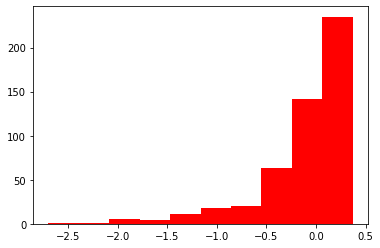

In [ ]:
import matplotlib.pyplot as plt
plt.hist(test_score,color = 'r')

In [ ]:
#2019
lr = LinearRegression()
train_score, test_score, RMSE, MAE = MCtraintest(500, X_2019, y_2019, lr, 0.25)
print("train",np.mean(train_score))
print("test",np.mean(test_score))  
print("RMSE",np.mean(RMSE))
print("MAE",np.mean(MAE)) 

train 0.38526142936809654
test -0.7078589052001164
RMSE 155.5486745301353
MAE 5.689872660981762


2.Lasso

optimized ALpha [1.55]
test score 0.11571201783834728
RMSE 3723.561974007876
MAE 24.80272427877819


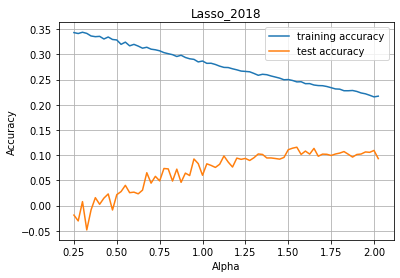

In [ ]:
#2018
from sklearn.linear_model import Lasso
train_accuracy = []
test_accuracy = []
RMSE_list = []
MAE_list = []
#MSLE_list = []

alpha_range = np.arange(start=0.25,stop=2.026,step=0.025)
#startTime = perf_counter()
for alpha in alpha_range:
    modelobj = Lasso(alpha = alpha)
    train_score, test_score, RMSE, MAE = MCtraintest(500, X_2018, y_2018, modelobj, 0.25)
    train_accuracy.append(np.mean(train_score))
    test_accuracy.append(np.mean(test_score))  
    RMSE_list.append(np.mean(RMSE))
    MAE_list.append(np.mean(MAE)) 
    #MSLE_list.append(np.mean(MSLE))
#endTime = perf_counter()

j = np.where(test_accuracy==np.max(test_accuracy))
print("optimized ALpha", alpha_range[j])
#print("Elapsed time grid search:" , endTime - startTime)
#alpha_range[np.argmax(test_accuracy)]
print("test score", np.max(test_accuracy))
print("RMSE", np.min(RMSE_list))
print("MAE",np.min(MAE_list))
#print("MSLE",np.min(MSLE_list))

import matplotlib.pyplot as plt
plt.plot(alpha_range, train_accuracy, label = 'training accuracy')
plt.plot(alpha_range, test_accuracy, label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Alpha")
plt.title("Lasso_2018")
plt.grid()
plt.legend()

In [ ]:

La = Lasso(alpha = alpha_range[j])
la_coef = []
for i in range(250):
  X_train, X_test, y_train, y_test = train_test_split(X_2018,y_2018,test_size=0.25)
  La.fit(X_train,y_train)
  la_coef.append(La.coef_)
la_coef_trans = pd.DataFrame(la_coef)
print(la_coef_trans)
#La.get_params()
Avg_coef = la_coef_trans.mean(axis = 0)

print(Avg_coef)

# print(Avg_coef)
print((abs(Avg_coef)<1).value_counts())
boolean_18 = abs(Avg_coef) !=0
X_2018.columns = range(41)

           0    1         2    3   ...        37        38         39        40
0    0.000000 -0.0  1.183425  0.0  ... -2.523792 -3.109008   7.698916  0.756242
1    0.000000  0.0  1.935249  0.0  ... -5.873641 -3.152163  12.196034  1.480942
2    0.802754 -0.0  1.335144  0.0  ... -3.490092 -2.232377  10.988126  0.887373
3    0.000000  0.0  0.082434  0.0  ... -2.956074 -3.727497   9.739384  3.558193
4   -0.000000 -0.0 -0.000000  0.0  ... -2.501402 -0.899870   3.144758 -0.000000
..        ...  ...       ...  ...  ...       ...       ...        ...       ...
245  0.000000 -0.0  0.311007  0.0  ... -2.903789 -2.961161  10.188472  1.573699
246  0.000000  0.0 -0.000000  0.0  ... -1.366342 -6.039178   7.747243  2.539550
247  0.000000 -0.0 -0.000000  0.0  ... -1.536262 -0.101856   1.894233  0.000000
248  0.000000 -0.0  1.284719  0.0  ... -4.002383 -4.492829  10.082010  4.013777
249  0.000000 -0.0  0.803764  0.0  ... -1.250555 -0.000000   7.447402 -0.000000

[250 rows x 41 columns]
0      0.193970

In [ ]:
#X_2018 = pd.DataFrame(X_2018)
#X_2018.drop(columns = ['marriage','marketRelevance','age','wives','children','childedu'], inplace = True)
#X_2018 = X_2018.to_numpy()
#X_2019 = pd.DataFrame(X_2019)
#X_2019.drop(columns = ['marriage','marketRelevance','age','wives','children','childedu'], inplace = True)
#X_2019 = X_2019.to_numpy()

optimized ALpha [0.75]
test score -0.00775369070474162
RMSE 126.90725675570211
MAE 3.900126488269774


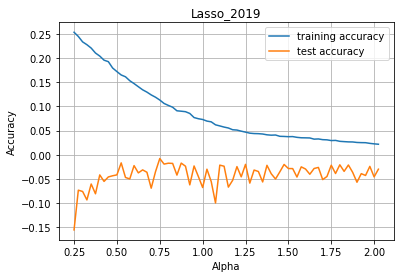

In [ ]:
#2019
train_accuracy = []
test_accuracy = []
RMSE_list = []
MAE_list = []
#MSLE_list = []

alpha_range = np.arange(start=0.25,stop=2.026,step=0.025)
#startTime = perf_counter()
for alpha in alpha_range:
    modelobj = Lasso(alpha = alpha)
    train_score, test_score, RMSE, MAE = MCtraintest(500, X_2019, y_2019, modelobj, 0.25)
    train_accuracy.append(np.mean(train_score))
    test_accuracy.append(np.mean(test_score))  
    RMSE_list.append(np.mean(RMSE))
    MAE_list.append(np.mean(MAE)) 
    #MSLE_list.append(np.mean(MSLE))
#endTime = perf_counter()

j = np.where(test_accuracy==np.max(test_accuracy))
print("optimized ALpha", alpha_range[j])
#print("Elapsed time grid search:" , endTime - startTime)
#alpha_range[np.argmax(test_accuracy)]
print("test score", np.max(test_accuracy))
print("RMSE", np.min(RMSE_list))
print("MAE",np.min(MAE_list))
#print("MSLE",np.min(MSLE_list))

import matplotlib.pyplot as plt
plt.plot(alpha_range, train_accuracy, label = 'training accuracy')
plt.plot(alpha_range, test_accuracy, label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Alpha")
plt.title("Lasso_2019")
plt.grid()
plt.legend()

In [ ]:
La = Lasso(alpha = alpha_range[j])
la_coef = []
for i in range(250):
  X_train, X_test, y_train, y_test = train_test_split(X_2019,y_2019,test_size=0.2)
  La.fit(X_train,y_train)
  la_coef.append(La.coef_)
la_coef_trans = pd.DataFrame(la_coef)
print(la_coef_trans)
#La.get_params()
Avg_coef = la_coef_trans.mean(axis = 0)

print(Avg_coef)

# print(Avg_coef)
print((abs(Avg_coef)==0).value_counts())
boolean_19 = abs(Avg_coef) !=0
X_2019.columns = range(41)

      0    1         2    3   ...        37        38        39   40
0   -0.0 -0.0 -0.000000  0.0  ... -0.435102 -0.027065  0.000000 -0.0
1   -0.0 -0.0 -0.000000  0.0  ... -0.116306 -0.033422  0.000000 -0.0
2   -0.0 -0.0 -0.010390  0.0  ... -0.440226 -0.000000  0.000000 -0.0
3   -0.0 -0.0 -0.115560  0.0  ... -0.078267 -0.000000  0.000000 -0.0
4   -0.0 -0.0 -0.000000  0.0  ... -0.284827 -0.053005 -0.000000 -0.0
..   ...  ...       ...  ...  ...       ...       ...       ...  ...
245 -0.0 -0.0 -0.392477  0.0  ... -0.313097 -0.579632  0.000000 -0.0
246 -0.0 -0.0 -0.012573  0.0  ... -0.512632 -0.045053  0.000000 -0.0
247 -0.0 -0.0 -0.133920  0.0  ... -0.371998 -0.083543  0.000000 -0.0
248 -0.0 -0.0 -0.355883  0.0  ... -0.344813 -0.177112  0.194051 -0.0
249 -0.0 -0.0 -0.000000  0.0  ... -0.044484 -0.000000  0.000000 -0.0

[250 rows x 41 columns]
0    -0.000890
1     0.000000
2    -0.163410
3     0.000000
4    -0.963290
5    -0.010519
6     0.000000
7     0.000000
8     0.000000
9     0.0054

In [ ]:
boolean = []
for i in range(41):
  if boolean_18[i] == False and boolean_19[i] == False:
    boolean.append(False)
  else:
    boolean.append(True)

X_2018 = X_2018.loc[:,boolean]
X_2019 = X_2019.loc[:,boolean]

X_2018

,0,2,4,5,6,7,9,11,12,13,14,15,16,17,19,20,22,23,25,26,28,29,31,32,33,34,35,36,37,38,39,40
0,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1,0,0,0,1,1,0,0,0.617177,2.546624,2.278734,-1.097872,-0.118126,-0.301808,-0.305989,7.807920e-01,8.766173e-01,0.617177
1,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0,0,0,1,1,0,0,-0.565138,2.546624,0.821996,-1.097872,-0.729041,-0.301808,-0.545416,7.807920e-01,8.766173e-01,-0.565138
2,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0,0,0,1,1,0,0,0.830929,2.546624,1.550365,-1.097872,0.492789,-0.301808,-0.570499,7.807920e-01,8.766173e-01,0.830929
3,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0,0,0,0,1,1,0,0,-0.190472,-0.907340,1.186180,-1.097872,-0.118126,-0.440561,-0.654868,5.602492e-01,-6.512014e-01,-0.000000
4,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0,0,0,0,1,1,0,0,0.617177,-0.907340,1.550365,-1.097872,-0.729041,-0.718067,-0.796244,6.705206e-01,-6.512014e-01,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,1,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,0,0,1,0,0,0,0,1,1.099345,0.819642,0.457811,-1.097872,-0.118126,0.391957,0.000000,-7.835252e-16,-4.553255e-08,0.000000
506,1,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1,0,1,0,0,0,0,1,1.644882,0.819642,1.186180,-0.153942,-0.118126,-0.301808,0.000000,-7.835252e-16,-4.553255e-08,1.644882
509,0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1,0,1,0,0,0,0,1,1.033900,0.819642,-0.270558,-1.097872,-0.729041,-0.440561,0.000000,-7.835252e-16,-4.553255e-08,1.033900
510,1,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,0,0,1,0,0,0,0,1,0.689695,0.819642,0.821996,-0.625907,-0.729041,-0.024302,0.000000,-7.835252e-16,-4.553255e-08,0.000000


3.Ridge

In [ ]:
#2018
train_accuracy = []
test_accuracy = []
RMSE_list = []
MAE_list = []

alpha_range = np.arange(start=1.0,stop=2.025,step=0.05)

#startTime = perf_counter()
for alpha in alpha_range:
    modelobj = Ridge(alpha = alpha)
    train_score, test_score, RMSE, MAE = MCtraintest(100, X_2018, y_2018, modelobj, 0.20)
    train_accuracy.append(np.mean(train_score))
    test_accuracy.append(np.mean(test_score)) 
    RMSE_list.append(np.mean(RMSE))
    MAE_list.append(np.mean(MAE))
#endTime = perf_counter()

j = np.where(test_accuracy==np.max(test_accuracy))
print("optimized ALpha", alpha_range[j])
#print("Elapsed time grid search:" , endTime - startTime)
#alpha_range[np.argmax(test_accuracy)]
print("test score", np.max(test_accuracy)) 
print("RMSE", np.min(RMSE_list))
print("MAE",np.min(MAE_list))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(alpha_range, train_accuracy, label = 'training accuracy')
plt.plot(alpha_range, test_accuracy, label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Alpha")
plt.title("Ridge_2018")
plt.grid()
plt.legend()

In [ ]:
#2019
train_accuracy = []
test_accuracy = []
RMSE_list = []
MAE_list = []

alpha_range = np.arange(start=1.0,stop=2.025,step=0.05)
#startTime = perf_counter()
for alpha in alpha_range:
    modelobj = Ridge(alpha = alpha)
    train_score, test_score, RMSE, MAE = MCtraintest(100, X_2019, y_2019, modelobj, 0.25)
    train_accuracy.append(np.mean(train_score))
    test_accuracy.append(np.mean(test_score)) 
    RMSE_list.append(np.mean(RMSE))
    MAE_list.append(np.mean(MAE))
#endTime = perf_counter()

j = np.where(test_accuracy==np.max(test_accuracy))
print("optimized ALpha", alpha_range[j])
#print("Elapsed time grid search:" , endTime - startTime)
#alpha_range[np.argmax(test_accuracy)]
print("test score", np.max(test_accuracy)) 
print("RMSE", np.min(RMSE_list))
print("MAE",np.min(MAE_list))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(alpha_range, train_accuracy, label = 'training accuracy')
plt.plot(alpha_range, test_accuracy, label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Alpha")
plt.title("Ridge_2019")
plt.grid()
plt.legend()

3. Polynomial ridge

In [ ]:
#2018
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
                  
train_accuracy = []
test_accuracy = []
RMSE_list = []
MAE_list = []
alpha_range = np.arange(start=0.01,stop=1.0,step=0.2)

#startTime = perf_counter()
for alpha in alpha_range:
    modelobj = Pipeline([('poly', PolynomialFeatures(degree=2,include_bias=False)),
                         ('Ridge', Ridge(alpha = alpha))])
    train_score, test_score, RMSE, MAE = MCtraintest(100, X_2018, y_2018, modelobj,0.25 )
    train_accuracy.append(np.mean(train_score))
    test_accuracy.append(np.mean(test_score))   
    RMSE_list.append(np.mean(RMSE))
    MAE_list.append(np.mean(MAE))
#endTime = perf_counter()

j = np.where(test_accuracy==np.max(test_accuracy))
print("optimized ALpha", alpha_range[j])
# print("Elapsed time grid search:" , endTime - startTime)
#alpha_range[np.argmax(test_accuracy)]
print("test score", np.max(test_accuracy)) 
print("RMSE", np.min(RMSE_list))
print("MAE",np.min(MAE_list))

In [ ]:
plt.plot(alpha_range, train_accuracy, label = 'training accuracy')
plt.plot(alpha_range, test_accuracy, label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Alpha")
plt.title("Polynomial Ridge_2018")
plt.grid()
plt.legend()

In [ ]:
#2019
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
                  
train_accuracy = []
test_accuracy = []
RMSE_list = []
MAE_list = []
alpha_range = np.arange(start=0.01,stop=1.0,step=0.2)

#startTime = perf_counter()
for alpha in alpha_range:
    modelobj = Pipeline([('poly', PolynomialFeatures(degree=2,include_bias=False)),
                         ('Ridge', Ridge(alpha = alpha))])
    train_score, test_score, RMSE, MAE = MCtraintest(100, X_2019, y_2019, modelobj,0.25 )
    train_accuracy.append(np.mean(train_score))
    test_accuracy.append(np.mean(test_score))   
    RMSE_list.append(np.mean(RMSE))
    MAE_list.append(np.mean(MAE))
#endTime = perf_counter()

j = np.where(test_accuracy==np.max(test_accuracy))
print("optimized ALpha", alpha_range[j])
# print("Elapsed time grid search:" , endTime - startTime)
#alpha_range[np.argmax(test_accuracy)]
print("test score", np.max(test_accuracy)) 
print("RMSE", np.min(RMSE_list))
print("MAE",np.min(MAE_list))

In [ ]:
plt.plot(alpha_range, train_accuracy, label = 'training accuracy')
plt.plot(alpha_range, test_accuracy, label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Alpha")
plt.title("Polynomial Ridge_2019")
plt.grid()
plt.legend()

4. Kernel Ridge

In [ ]:
#2018
from sklearn.kernel_ridge import KernelRidge

train_accuracy = []
test_accuracy = []
RMSE_list = []
MAR_list = []
alpha_range = np.arange(start = 2.5,stop = 4, step = 0.1)
gamma_range = [0.1]

#startTime = perf_counter()
for alpha in alpha_range:
    for gamma in gamma_range:
        modelobj = KernelRidge(alpha = alpha, kernel = 'rbf', gamma = gamma)
        train_score, test_score, RMSE, MAE = MCtraintest(500, X_2018, y_2018, modelobj,0.2 )
        train_accuracy.append(np.mean(train_score))
        test_accuracy.append(np.mean(test_score))  
        RMSE_list.append(np.mean(RMSE))
        MAE_list.append(np.mean(MAE)) 
#endTime = perf_counter()

j = np.where(test_accuracy==np.max(test_accuracy))
#print("Elapsed time grid search:" , endTime - startTime)
print("test score", np.max(test_accuracy)) 
print("RMSE", np.min(RMSE_list))
print("MAE",np.min(MAE_list))
print(test_accuracy)

In [ ]:
plt.plot(alpha_range, train_accuracy, label = 'training accuracy')
plt.plot(alpha_range, test_accuracy, label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Alpha")
plt.title("Polynomial Ridge_2019")
plt.grid()
plt.legend()

In [ ]:
#2019
from sklearn.kernel_ridge import KernelRidge

train_accuracy = []
test_accuracy = []
RMSE_list = []
MAR_list = []
alpha_range = np.arange(start = 2.5,stop = 4, step = 0.1)
gamma_range = [0.1]

#startTime = perf_counter()
for alpha in alpha_range:
    for gamma in gamma_range:
        modelobj = KernelRidge(alpha = alpha, kernel = 'rbf', gamma = gamma)
        train_score, test_score, RMSE, MAE = MCtraintest(100, X_2019, y_2019, modelobj,0.25 )
        train_accuracy.append(np.mean(train_score))
        test_accuracy.append(np.mean(test_score))  
        RMSE_list.append(np.mean(RMSE))
        MAE_list.append(np.mean(MAE)) 
#endTime = perf_counter()

j = np.where(test_accuracy==np.max(test_accuracy))
#print("Elapsed time grid search:" , endTime - startTime)
print("test score", np.max(test_accuracy)) 
print("RMSE", np.min(RMSE_list))
print("MAE",np.min(MAE_list))

5. KNN Grid search

In [ ]:
#2018
train_accuracy = []
test_accuracy = []
RMSE_list = []
MAE_list = []

k_range = np.arange(start=5,stop=50,step=4)

#startTime = perf_counter()
for k in k_range:
    modelobj = KNeighborsRegressor(n_neighbors = k)
    train_score, test_score, RMSE, MAE = MCtraintest(100, X_2018, y_2018, modelobj,0.25)
    train_accuracy.append(np.mean(train_score))
    test_accuracy.append(np.mean(test_score))   
    RMSE_list.append(np.mean(RMSE))
    MAE_list.append(np.mean(MAE))
#endTime = perf_counter()

j = np.where(test_accuracy==np.max(test_accuracy))
print("optimized n_neibors", k_range[j])
#print("Elapsed time grid search:" , endTime - startTime)
#alpha_range[np.argmax(test_accuracy)]
print("test score", np.max(test_accuracy)) 
print("RMSE", np.min(RMSE_list))
print("MAE", np.min(MAE_list))

In [ ]:
plt.plot(k_range, train_accuracy, label = 'training accuracy')
plt.plot(k_range, test_accuracy, label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.title("KNNR_2018")
plt.grid()
plt.legend()

In [ ]:
#2019
train_accuracy = []
test_accuracy = []
RMSE_list = []
MAE_list = []

k_range = np.arange(start=5,stop=50,step=4)

#startTime = perf_counter()
for k in k_range:
    modelobj = KNeighborsRegressor(n_neighbors = k)
    train_score, test_score, RMSE, MAE = MCtraintest(100, X_2019, y_2019, modelobj,0.25)
    train_accuracy.append(np.mean(train_score))
    test_accuracy.append(np.mean(test_score))   
    RMSE_list.append(np.mean(RMSE))
    MAE_list.append(np.mean(MAE))
#endTime = perf_counter()

j = np.where(test_accuracy==np.max(test_accuracy))
print("optimized n_neibors", k_range[j])
#print("Elapsed time grid search:" , endTime - startTime)
#alpha_range[np.argmax(test_accuracy)]
print("test score", np.max(test_accuracy)) 
print("RMSE", np.min(RMSE_list))
print("MAE", np.min(MAE_list))

In [ ]:
plt.plot(k_range, train_accuracy, label = 'training accuracy')
plt.plot(k_range, test_accuracy, label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.title("KNNR_2019")
plt.grid()
plt.legend()

6. Support vector regression

In [ ]:
#2018
train_accuracy = []
test_accuracy = []
RMSE_list = []
MAE_list = []

c_range = np.arange(start=0.9,stop=20.9,step=5)
grange = [0.0001,0.001,0.1,0.5,1.0,1.5,2.0]

#startTime = perf_counter()
for g in grange:
  for c in c_range:
    modelobj = SVR(kernel = 'rbf',tol=0.001,gamma = g, C = c)
    train_score, test_score, RMSE, MAE = MCtraintest(100, X_2018, y_2018, modelobj,0.25)
    train_accuracy.append(np.mean(train_score))
    test_accuracy.append(np.mean(test_score))
    RMSE_list.append(np.mean(RMSE))
    MAE_list.append(np.mean(MAE))   
#endTime = perf_counter()

j = np.where(test_accuracy==np.max(test_accuracy))
#print("optimized C", c_range[j])
#print("Elapsed time grid search:" , endTime - startTime)
print("test score", np.max(test_accuracy)) 
print("RMSE", np.min(RMSE_list))
print("MAE",np.min(MAE_list))

In [ ]:
# plt.plot(c_range, train_accuracy, label = 'training accuracy')
# plt.plot(c_range, test_accuracy, label = 'test accuracy')
# plt.ylabel("Accuracy")
# plt.xlabel("C")
# plt.title("SVR")
# plt.grid()
# plt.legend()

In [ ]:
#2019
train_accuracy = []
test_accuracy = []
RMSE_list = []
MAE_list = []

c_range = np.arange(start=0.9,stop=20.9,step=5)
grange = [0.0001,0.001,0.1,0.5,1.0,1.5,2.0]

#startTime = perf_counter()
for g in grange:
  for c in c_range:
    modelobj = SVR(kernel = 'rbf',tol=0.001,gamma = g, C = c)
    train_score, test_score, RMSE, MAE = MCtraintest(100, X_2019, y_2019, modelobj,0.25)
    train_accuracy.append(np.mean(train_score))
    test_accuracy.append(np.mean(test_score))
    RMSE_list.append(np.mean(RMSE))
    MAE_list.append(np.mean(MAE))   
#endTime = perf_counter()

j = np.where(test_accuracy==np.max(test_accuracy))
#print("optimized C", c_range[j])
#print("Elapsed time grid search:" , endTime - startTime)
print("test score", np.max(test_accuracy)) 
print("RMSE", np.min(RMSE_list))
print("MAE",np.min(MAE_list))

7. Decision Tree Regressor

In [ ]:
#2018
train_accuracy = []
test_accuracy = []
RMSE_list = []
MAE_list = []
maxdepth_range = np.arange(start = 5, stop = 41, step = 5)

#startTime = perf_counter()
for maxdepth in maxdepth_range:
    modelobj = DecisionTreeRegressor(max_depth=maxdepth)
    train_score, test_score, RMSE, MAE = MCtraintest(100, X_2018, y_2018, modelobj,0.25)
    train_accuracy.append(np.mean(train_score))
    test_accuracy.append(np.mean(test_score))
    RMSE_list.append(np.mean(RMSE))
    MAE_list.append(np.mean(MAE))
#endTime = perf_counter()

j = np.where(test_accuracy==np.max(test_accuracy))

print("optimized maxdepth", maxdepth_range[j])
#print("Elapsed time grid search:" , endTime - startTime)
print("test score", np.max(test_accuracy)) 
print("RMSE", np.min(RMSE_list))
print("MAE",np.min(MAE_list))

In [ ]:
#2019
train_accuracy = []
test_accuracy = []
RMSE_list = []
MAE_list = []
maxdepth_range = np.arange(start = 5, stop = 41, step = 5)

#startTime = perf_counter()
for maxdepth in maxdepth_range:
    modelobj = DecisionTreeRegressor(max_depth=maxdepth)
    train_score, test_score, RMSE, MAE = MCtraintest(100, X_2019, y_2019, modelobj,0.25)
    train_accuracy.append(np.mean(train_score))
    test_accuracy.append(np.mean(test_score))
    RMSE_list.append(np.mean(RMSE))
    MAE_list.append(np.mean(MAE))
#endTime = perf_counter()

j = np.where(test_accuracy==np.max(test_accuracy))

print("optimized maxdepth", maxdepth_range[j])
#print("Elapsed time grid search:" , endTime - startTime)
print("test score", np.max(test_accuracy)) 
print("RMSE", np.min(RMSE_list))
print("MAE",np.min(MAE_list))

8. Random forest regressor

In [ ]:
#2018
from sklearn.ensemble import RandomForestRegressor

train_accuracy = []
test_accuracy = []
RMSE_list = []
MAE_list = []
maxdepth_range = np.arange(start = 10, stop = 25, step = 1)
maxfeatures_range = [10]
n_trees_range = np.arange(start= 70, stop = 100, step = 5)

#startTime = perf_counter()
for maxd in maxdepth_range:
    for maxf in maxfeatures_range:
        for n_trees in n_trees_range:
            modelobj = RandomForestRegressor(n_estimators = n_trees, max_depth = maxd, max_features = maxf)
            train_score, test_score, RMSE, MAE = MCtraintest(100, X_2018, y_2018, modelobj,0.25)
            train_accuracy.append(np.mean(train_score))
            test_accuracy.append(np.mean(test_score))  
            RMSE_list.append(np.mean(RMSE))
            MAE_list.append(np.mean(MAE)) 
#endTime = perf_counter()

#print("Elapsed time:" , endTime - startTime)
#print(test_accuracy)
print("test score", np.max(test_accuracy))
print("RMSE", np.min(RMSE_list))
print("MAE",np.min(MAE_list))

In [ ]:
#2019
from sklearn.ensemble import RandomForestRegressor

train_accuracy = []
test_accuracy = []
RMSE_list = []
MAE_list = []
maxdepth_range = np.arange(start = 10, stop = 25, step = 1)
maxfeatures_range = [10]
n_trees_range = np.arange(start= 70, stop = 100, step = 5)

#startTime = perf_counter()
for maxd in maxdepth_range:
    for maxf in maxfeatures_range:
        for n_trees in n_trees_range:
            modelobj = RandomForestRegressor(n_estimators = n_trees, max_depth = maxd, max_features = maxf)
            train_score, test_score, RMSE, MAE = MCtraintest(100, X_2019, y_2019, modelobj,0.25)
            train_accuracy.append(np.mean(train_score))
            test_accuracy.append(np.mean(test_score))  
            RMSE_list.append(np.mean(RMSE))
            MAE_list.append(np.mean(MAE)) 
#endTime = perf_counter()

#print("Elapsed time:" , endTime - startTime)
#print(test_accuracy)
print("test score", np.max(test_accuracy))
print("RMSE", np.min(RMSE_list))
print("MAE",np.min(MAE_list))


para_range = np.arange(len(test_accuracy))

plt.plot(para_range, train_accuracy, label = 'training accuracy')
plt.plot(para_range, test_accuracy, label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("parameters")
plt.title("forest_2019")
plt.grid()
plt.legend()

In [ ]:
new_X

,household,marriage,farmerEdu,farmPrimary,farmType,otherIncome,drought,fires,flood,wind,pest,disease,irrigate,weatherAccess,weatherRelevance,marketServices,marketRelevance,extensionServices,fin_acc,gender_M,saleChannel_Market,saleChannel_MarketWomen,saleChannel_MiddelMen,saleChannel_Self&Onfarm,irrigateSource_Other,irrigateSource_stream,soilMngm_INORGANIC,soilMngm_INTEGRATED SOIL MGT,soilMngm_Mulching&compost,soilMngm_None,soilMngm_Other,age,wives,children,childedu,farmNum,farmSize,capitalInput,distance,laborDays,age_sex
0,1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,1,1,0,0,0,0,0.617177,2.546624,2.278734,-1.097872,-0.118126,-0.301808,-0.305989,7.807920e-01,8.766173e-01,0.617177
1,1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,1,1,0,0,0,0,-0.565138,2.546624,0.821996,-1.097872,-0.729041,-0.301808,-0.545416,7.807920e-01,8.766173e-01,-0.565138
2,1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,1,1,0,0,0,0,0.830929,2.546624,1.550365,-1.097872,0.492789,-0.301808,-0.570499,7.807920e-01,8.766173e-01,0.830929
3,1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,1,1,0,0,0,0,-0.190472,-0.907340,1.186180,-1.097872,-0.118126,-0.440561,-0.654868,5.602492e-01,-6.512014e-01,-0.000000
4,1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,1,1,0,0,0,0,0.617177,-0.907340,1.550365,-1.097872,-0.729041,-0.718067,-0.796244,6.705206e-01,-6.512014e-01,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,1,0,0,1,0,0,0,0,0,0,1,0,1.587792,0.819642,0.457811,-1.097872,-0.118126,-0.579314,0.000000,-7.835252e-16,-4.553255e-08,1.587792
508,1,1.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,0,0,0,1,0,0,0,0,0,0,1,0,0.760932,0.819642,-0.270558,-1.097872,-0.729041,1.085722,0.000000,-7.835252e-16,-4.553255e-08,0.000000
509,0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,1,0,0,1,0,0,0,0,0,0,1,0,1.033900,0.819642,-0.270558,-1.097872,-0.729041,-0.440561,0.000000,-7.835252e-16,-4.553255e-08,1.033900
510,1,1.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,0,0,0,1,0,0,0,0,0,0,1,0,0.689695,0.819642,0.821996,-0.625907,-0.729041,-0.024302,0.000000,-7.835252e-16,-4.553255e-08,0.000000


In [ ]:
new_X2 = new_X.loc[:,boolean]
new_X2.isna().value_counts()

household  farmerEdu  farmType  otherIncome  drought  fires  wind   disease  irrigate  weatherAccess  weatherRelevance  marketServices  marketRelevance  extensionServices  gender_M  saleChannel_Market  saleChannel_MiddelMen  saleChannel_Self&Onfarm  irrigateSource_stream  soilMngm_INORGANIC  soilMngm_Mulching&compost  soilMngm_None  age    wives  children  childedu  farmNum  farmSize  capitalInput  distance  laborDays  age_sex
False      False      False     False        False    False  False  False    False     False          False             False           False            False              False     False               False                  False                    False                  False               False                      False          False  False  False     False     False    False     False         False     False      False      512
dtype: int64

In [ ]:
krmodel = KernelRidge(alpha = 3.8, kernel = "rbf", gamma = 0.1)
krmodel.fit(X_2018,y_2018)
predicts = krmodel.predict(new_X2).tolist()

In [ ]:
import heapq
max_predicts_index_list = map(predicts.index, heapq.nlargest(10, predicts))
print("highest prediction in 2018", list(max_predicts_index_list))

highest prediction in 2018 [394, 378, 477, 460, 398, 396, 400, 404, 380, 402]


In [ ]:
original_data = pd.read_csv('compiled.csv')

display(original_data.iloc[394,7])
display(original_data.iloc[378,7])
display(original_data.iloc[477,7])
display(original_data.iloc[460,7])
display(original_data.iloc[398,7])
display(original_data.iloc[396,7])
display(original_data.iloc[400,7])
display(original_data.iloc[404,7])
display(original_data.iloc[380,7])
display(original_data.iloc[402,7])


'BOATENG JOSEPH'

'TWUM KWAME'

'Clement Attakora'

'Yaro Ndannai'

'ADJEI BAAH'

'COMFORT OKYERE'

'ANTWI BOASIAKO'

'BOSOMPEM DANIEL'

'HAKEEM MARFO'

'MARGARET BOAHEN'

In [ ]:
display(data.iloc[394])

age                    4.20469
gender                       M
household                    1
marriage                     1
wives                        1
children                     7
childEdu                     2
farmerEdu                    2
farmPrimary                  1
farmNum                      4
farmType                     2
farmSize                     1
acreage_2018               448
yield_2018                3325
sales_2018                 475
price_2018                2000
cost_2018                  0.5
acreage_2019               256
yield_2019                2060
sales_2019                 515
price_2019                 515
cost_2019                 1000
otherIncome                  1
drought                      1
fires                        1
flood                        0
wind                         1
pest                         1
disease                      0
capitalInput               500
distance                     1
saleChannel          MiddelMen
irrigate